In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


## Benchmark Data

In [57]:
arr_bench = pd.DataFrame({'method': ['naive_lin_svm','lin_svm','hardt','zafar','ERM_lin','naive_svm','SVM','hardt','ERM', 'cart'],
                         'accuracy': [0.79,0.78,0.74,0.71,0.79,0.79,0.78,0.74,0.79,0.674],
                         'eps_test': [0.14,0.13,0.07,0.03,0.04,0.14,0.13,0.07,0.03,0.256]})

drug_bench = pd.DataFrame({'method': ['naive_lin_svm','lin_svm','hardt','zafar','ERM_lin','naive_svm','SVM','hardt','ERM','cart'],
                         'accuracy': [0.81,0.81,0.77,0.69,0.79,0.82,0.81,0.75,0.8,0.77],
                         'eps_test': [0.44,0.41,0.22,0.02,0.05,0.45,0.38,0.14,0.07,0]})

### Arrythmia

In [2]:
arr = (pd.read_csv('arrythmiaCurve.csv')
       .drop("Unnamed: 0", axis=1)
       .assign(eps_test= lambda x: np.abs(x['eqOpTrue'] - x['eqOpFalse']),
              acc_diff = lambda x: np.abs(x['accTrue'] - x['accFalse'])))
arr.head()

,accuracy,accuracy_std,complexity,epsilon,eqOpTrue,eqOpFalse,accTrue,accFalse,ip,eps_test,acc_diff
0,0.633333,0.109432,10,0.01,0.422161,0.618960,0.685000,0.577381,117.75,0.196799,0.107619
1,0.705556,0.055277,15,0.01,0.428266,0.516457,0.737976,0.672619,100.00,0.088190,0.065357
2,0.733333,0.072008,20,0.01,0.538156,0.574142,0.781131,0.682143,85.00,0.035986,0.098988
3,0.705556,0.063586,30,0.01,0.565934,0.641106,0.750298,0.655655,63.50,0.075172,0.094643
4,0.577778,0.066667,5,0.01,0.339438,0.259716,0.654167,0.498512,143.00,0.079722,0.155655


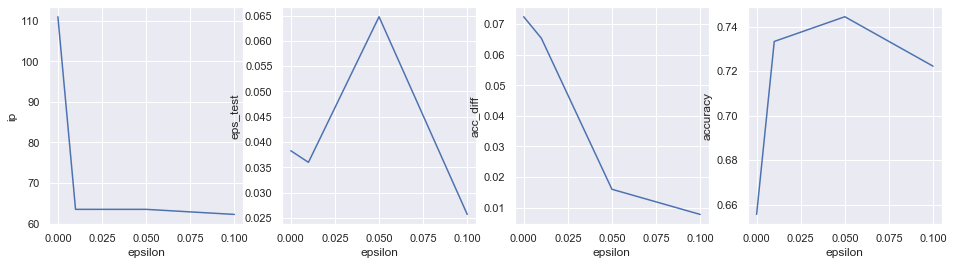

In [39]:
arr_eps = (arr[arr.epsilon < 0.5]
           .sort_values(by='epsilon', ascending=True)
           .groupby(['epsilon'])
           .agg({"ip": np.min,
                             "eps_test": np.min,
                              "acc_diff": np.min,
                             "accuracy": np.max})
           .reset_index()
           .assign(cumAcc=lambda df: df.accuracy.cummax()))

sns.set(rc={'figure.figsize':(16,4)})
fg, ax = plt.subplots(1, 4)

sns.lineplot(data=arr_eps, x='epsilon', y='ip', ax = ax[0])
sns.lineplot(data=arr_eps, x='epsilon', y='eps_test', ax = ax[1])
sns.lineplot(data=arr_eps, x='epsilon', y='acc_diff', ax = ax[2])
sns.lineplot(data=arr_eps, x='epsilon', y='accuracy', ax = ax[3])

plt.savefig('figs/arrythmia_crosssection.png')

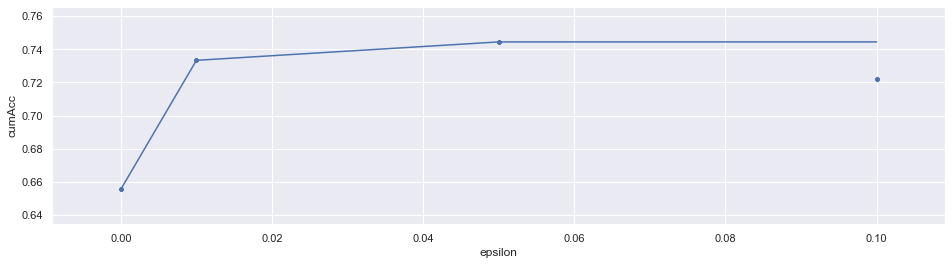

In [42]:
sns.set(sns.set(rc={'figure.figsize':(16,4)}))
sns.scatterplot(data=arr_eps, x = 'epsilon', y = 'accuracy')
sns.lineplot(data=arr_eps, x = 'epsilon', y = 'cumAcc')
plt.savefig('figs/arrythmia_acc_v_accuracy.png')

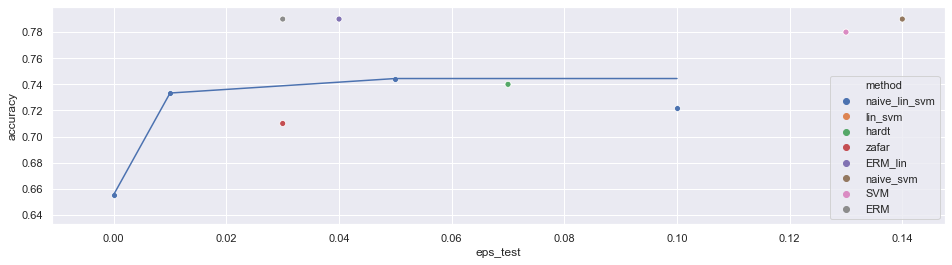

In [44]:
arr_eps = (arr[arr.epsilon < 0.5]
           .sort_values(by='epsilon', ascending=True)
           .groupby(['epsilon'])
           .agg({"ip": np.min,
                             "eps_test": np.min,
                              "acc_diff": np.min,
                             "accuracy": np.max})
           .reset_index()
           .assign(cumAcc=lambda df: df.accuracy.cummax()))

arr_eps_test = (arr
           .sort_values(by='eps_test', ascending=True)
           .groupby(['eps_test'])
           .agg({"ip": np.min,
                              "acc_diff": np.min,
                             "accuracy": np.max})
           .reset_index()
           .assign(cumAcc=lambda df: df.accuracy.cummax()))


sns.set(sns.set(rc={'figure.figsize':(16,4)}))
sns.scatterplot(data=arr_eps, x = 'epsilon', y = 'accuracy')
sns.lineplot(data=arr_eps, x = 'epsilon', y = 'cumAcc')
sns.scatterplot(data=arr_bench, x='eps_test', y='accuracy', hue='method')
plt.savefig('figs/arrythmia_epsTrain_v_accuracy.png')

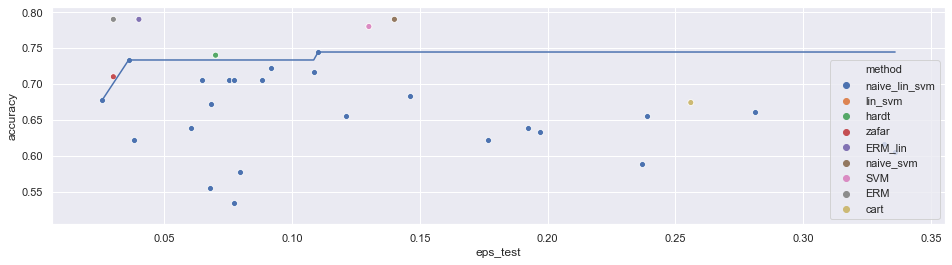

In [73]:
sns.set(sns.set(rc={'figure.figsize':(16,4)}))
sns.scatterplot(data=arr_eps_test, x = 'eps_test', y = 'accuracy')
sns.lineplot(data=arr_eps_test, x = 'eps_test', y = 'cumAcc')
sns.scatterplot(data=arr_bench, x='eps_test', y='accuracy', hue='method')
plt.savefig('figs/arrythmia_epsTest_v_accuracy.png')

### Drug

In [5]:
drug = (pd.read_csv('drugCurve.csv')
       .drop("Unnamed: 0", axis=1)
       .assign(eps_test= lambda x: np.abs(x['eqOpTrue'] - x['eqOpFalse']),
              acc_diff = lambda x: np.abs(x['accTrue'] - x['accFalse'])))
drug.head()

,accuracy,accuracy_std,complexity,epsilon,eqOpTrue,eqOpFalse,accTrue,accFalse,ip,eps_test,acc_diff
0,0.766361,0.011690,10,0.01,0.087852,0.150000,0.772236,0.702778,363.000000,0.062148,0.069459
1,0.759278,0.007086,15,0.01,0.096399,0.233333,0.762569,0.725000,351.000000,0.136935,0.037569
2,0.755732,0.009196,20,0.01,0.096848,0.000000,0.762558,0.681944,343.000000,0.096848,0.080613
3,0.746895,0.003131,30,0.01,0.087852,0.250000,0.749048,0.726389,331.000000,0.162148,0.022659
4,0.773416,0.015722,5,0.01,0.017544,0.000000,0.781826,0.681944,381.666667,0.017544,0.099881


In [49]:
drug[drug.epsilon == 0]

,accuracy,accuracy_std,complexity,epsilon,eqOpTrue,eqOpFalse,accTrue,accFalse,ip,eps_test,acc_diff
20,0.778716,0.018043,10,0.0,0.045249,0.0,0.787628,0.681944,386.00,0.045249,0.105684
21,0.776962,0.011999,15,0.0,0.000000,0.0,0.785701,0.681944,386.00,0.000000,0.103757
22,0.776962,0.011999,20,0.0,0.000000,0.0,0.785701,0.681944,386.00,0.000000,0.103757
23,0.776962,0.011999,30,0.0,0.000000,0.0,0.785701,0.681944,386.00,0.000000,0.103757
24,0.781134,0.012657,5,0.0,0.000000,0.0,0.788698,0.698958,386.75,0.000000,0.089740


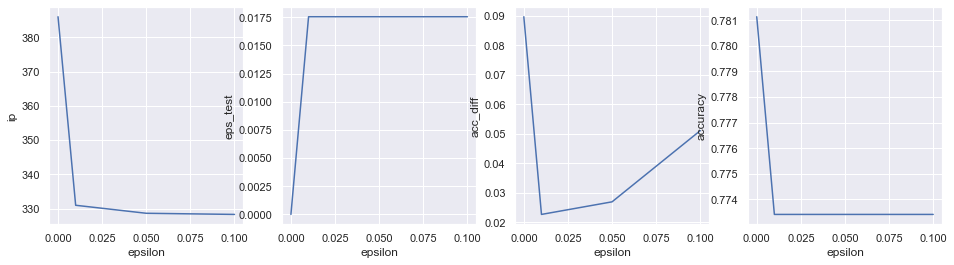

In [46]:
drug_eps = (drug[drug.epsilon < 0.5]
           .groupby(['epsilon'])
           .agg({"ip": np.min,
                             "eps_test": np.min,
                              "acc_diff": np.min,
                             "accuracy": np.max})
           .reset_index()
           .assign(cumAcc=lambda df: df.accuracy.cummax()))

sns.set(rc={'figure.figsize':(16,4)})
fg, ax = plt.subplots(1, 4)

sns.lineplot(data=drug_eps, x='epsilon', y='ip', ax = ax[0])
sns.lineplot(data=drug_eps, x='epsilon', y='eps_test', ax = ax[1])
sns.lineplot(data=drug_eps, x='epsilon', y='acc_diff', ax = ax[2])
sns.lineplot(data=drug_eps, x='epsilon', y='accuracy', ax = ax[3])
plt.savefig('figs/drugs_cross.png')

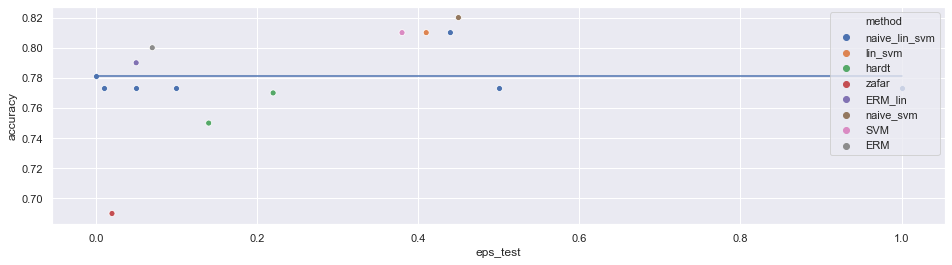

In [47]:
drug_eps = (drug
           .sort_values(by='epsilon', ascending=True)
           .groupby(['epsilon'])
           .agg({"ip": np.min,
                             "eps_test": np.min,
                              "acc_diff": np.min,
                             "accuracy": np.max})
           .reset_index()
           .assign(cumAcc=lambda df: df.accuracy.cummax()))

drug_eps_test = (drug
           .sort_values(by='eps_test', ascending=True)
           .groupby(['eps_test'])
           .agg({"ip": np.min,
                              "acc_diff": np.min,
                             "accuracy": np.max})
           .reset_index()
           .assign(cumAcc=lambda df: df.accuracy.cummax()))


sns.set(sns.set(rc={'figure.figsize':(16,4)}))
sns.scatterplot(data=drug_eps, x = 'epsilon', y = 'accuracy')
sns.lineplot(data=drug_eps, x = 'epsilon', y = 'cumAcc')
sns.scatterplot(data=drug_bench, x='eps_test', y='accuracy', hue='method')
plt.savefig('figs/drugs_epsTr_v_accuracy.png')

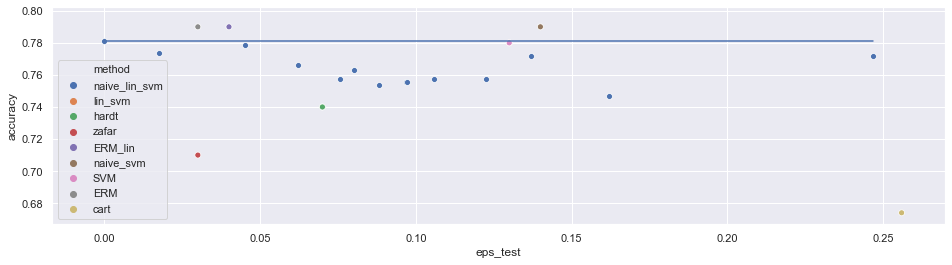

In [72]:
sns.set(sns.set(rc={'figure.figsize':(16,4)}))
sns.scatterplot(data=drug_eps_test, x = 'eps_test', y = 'accuracy')
sns.lineplot(data=drug_eps_test, x = 'eps_test', y = 'cumAcc')
sns.scatterplot(data=arr_bench, x='eps_test', y='accuracy', hue='method')
plt.savefig('figs/drugs_epsTest_v_accuracy.png')

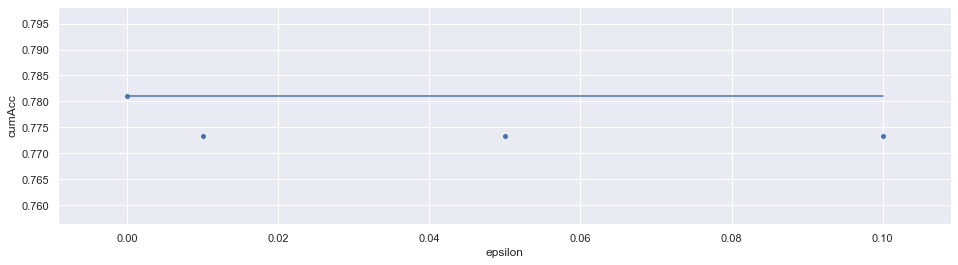

In [21]:
sns.set(sns.set(rc={'figure.figsize':(16,4)}))
sns.scatterplot(data=drug_eps, x = 'epsilon', y = 'accuracy')
sns.lineplot(data=drug_eps, x = 'epsilon', y = 'cumAcc')